In [12]:
import pandas as pd
import numpy as np
import chart_studio.plotly as py
import cufflinks as cf
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline

# Make Plotly work in your Jupyter Notebook
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
# Use Plotly locally
cf.go_offline()

In [13]:
df3_logical=pd.read_csv('../DATASETS/Performance/sp1.csv')
df3_litrature=pd.read_csv('../DATASETS/Performance/sp2.csv')


In [14]:
df3_logical.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [15]:
df3_litrature.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [16]:
df3_logical.rename(columns={'G1':'G1_Mat', 'G2':'G2_Mat', 'G3':'G3_Mat'}, inplace=True)
df3_litrature.rename(columns={'G1':'G1_Por', 'G2':'G2_Por', 'G3':'G3_Por'}, inplace=True)


In [17]:
both = pd.merge(df3_logical, df3_litrature, on=['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences'])
both = both.drop_duplicates()

In [18]:
both.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1_Mat,G2_Mat,G3_Mat,G1_Por,G2_Por,G3_Por
count,85.000000,85.00000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.00000,85.000000,85.000000,85.000000
mean,16.388235,2.80000,2.647059,1.352941,2.105882,0.094118,4.176471,3.211765,2.811765,1.282353,1.976471,3.505882,1.894118,12.082353,12.235294,12.00000,12.752941,12.823529,13.211765
std,1.165926,1.20317,1.065765,0.611514,0.845486,0.397118,0.675709,0.989157,1.085556,0.525805,1.194994,1.436128,3.015924,3.274038,3.228029,4.38341,2.613636,2.545661,2.891260
min,15.000000,0.00000,1.000000,1.000000,1.000000,0.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,6.000000,5.000000,0.00000,5.000000,8.000000,0.000000
25%,15.000000,2.00000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,9.000000,10.000000,10.00000,11.000000,11.000000,11.000000
50%,16.000000,3.00000,3.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,0.000000,12.000000,12.000000,12.00000,13.000000,12.000000,13.000000
75%,17.000000,4.00000,4.000000,2.000000,3.000000,0.000000,5.000000,4.000000,4.000000,1.000000,3.000000,5.000000,2.000000,14.000000,15.000000,15.00000,14.000000,14.000000,15.000000
max,19.000000,4.00000,4.000000,3.000000,4.000000,3.000000,5.000000,5.000000,5.000000,3.000000,5.000000,5.000000,14.000000,19.000000,19.000000,19.00000,19.000000,18.000000,19.000000


In [15]:
both.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid_x', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1_Mat', 'G2_Mat', 'G3_Mat', 'paid_y',
       'G1_Por', 'G2_Por', 'G3_Por'],
      dtype='object')



    sex - student's sex (binary: 'F' - female or 'M' - male)
    age - student's age (numeric: from 15 to 22)
    address - student's home address type (binary: 'U' - urban or 'R' - rural)
    famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
    Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
    Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
    Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
    traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
    studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
    failures - number of past class failures (numeric: n if 1<=n<3, else 4)
    schoolsup - extra educational support (binary: yes or no)
    famsup - family educational support (binary: yes or no)
    paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
    activities - extra-curricular activities (binary: yes or no)
    nursery - attended nursery school (binary: yes or no)
    higher - wants to take higher education (binary: yes or no)
    internet - Internet access at home (binary: yes or no)
    romantic - with a romantic relationship (binary: yes or no)
    famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
    freetime - free time after school (numeric: from 1 - very low to 5 - very high)
    goout - going out with friends (numeric: from 1 - very low to 5 - very high)
    Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
    Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
    health - current health status (numeric: from 1 - very bad to 5 - very good)
    absences - number of school absences (numeric: from 0 to 93)

These grades are related with the course subject, Math or Portuguese:

    G1 - first period grade (numeric: from 0 to 20)
    G2 - second period grade (numeric: from 0 to 20)
    G3 - final grade (numeric: from 0 to 20, output target)

Additional note: there are several (382) students that belong to both datasets .
These students can be identified by searching for identical attributes
that characterize each student, as shown in the annexed R file.

In [6]:
df3_logical['Dalc'] = df3_logical['Dalc'] + df3_logical['Walc']

d:\Programs\ODU\env\lib\site-packages\seaborn\categorical.py:1296: UserWarning:

52.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

d:\Programs\ODU\env\lib\site-packages\seaborn\categorical.py:1296: UserWarning:

25.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

d:\Programs\ODU\env\lib\site-packages\seaborn\categorical.py:1296: UserWarning:

20.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

d:\Programs\ODU\env\lib\site-packages\seaborn\categorical.py:1296: UserWarning:

15.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

d:\Programs\ODU\env\lib\site-packages\seaborn\categorical.py:1296: UserWarning:

5.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

d:\Programs\ODU\env\lib\site-packages\seaborn\categorical.py:1296:

<AxesSubplot:xlabel='Dalc', ylabel='G3'>

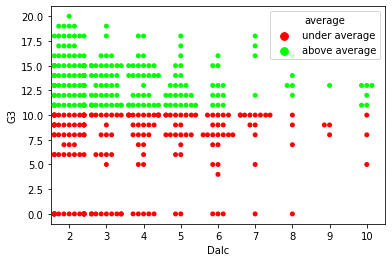

In [7]:
ave = sum(df3_logical.G3)/float(len(df3_logical))
df3_logical['ave_line'] = ave
df3_logical['average'] = ['above average' if i > ave else 'under average' for i in df3_logical.G3]
sns.swarmplot(x='Dalc', y = 'G3', hue = 'average',data= df3_logical,palette={'above average':'lime', 'under average': 'red'})

In [16]:
both=both.drop(labels=['school','Mjob', 'Fjob', 'reason', 'guardian'],axis=1)

<AxesSubplot:xlabel='G3_Mat', ylabel='count'>

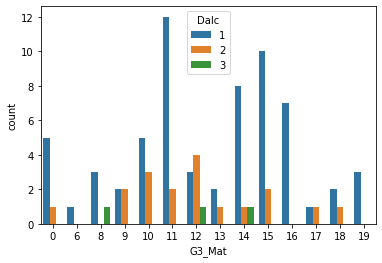

In [18]:
sns.countplot(x="G3_Mat", hue ="Dalc", data=both)

<AxesSubplot:xlabel='absences', ylabel='count'>

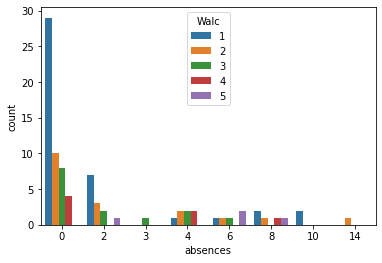

In [20]:
sns.countplot(x="absences", hue ="Walc", data=both)

In [67]:
gender = both.sex.value_counts(normalize=True)
print("Female = "+str(round(gender[0]*100))+"%")
print("Male = "+str(round(gender[1]*100))+"%")

Female = 59%
Male = 41%


<AxesSubplot:xlabel='sex', ylabel='count'>

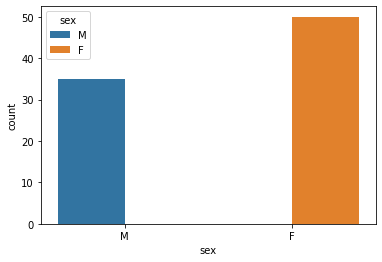

In [68]:
sns.countplot(x="sex", hue ="sex", data=both)

In [69]:
address = both.address.value_counts(normalize=True)
print("Rural = "+str(round(address[0]*100))+"%")
print("Urban = "+str(round(address[1]*100))+"%")


Rural = 80%
Urban = 20%


<AxesSubplot:xlabel='address', ylabel='count'>

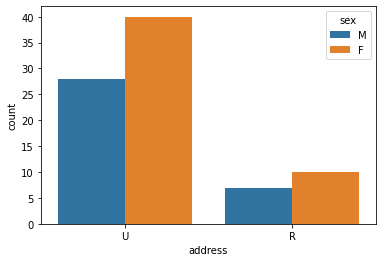

In [70]:
sns.countplot(x="address", hue ="sex", data=both)

d:\Programs\ODU\env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='age', ylabel='count'>

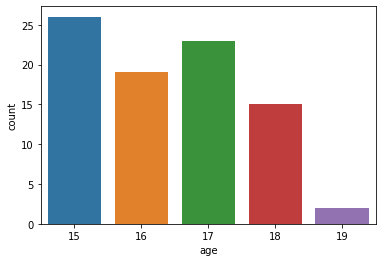

In [73]:
sns.countplot(both.age)

In [78]:
status=both.Pstatus.value_counts(normalize=True)
print("Together = "+str(round(status[0]*100))+"%")
print("Apart = "+str(round(status[1]*100))+"%")

Together = 92%
Apart = 8%


<AxesSubplot:xlabel='Pstatus', ylabel='count'>

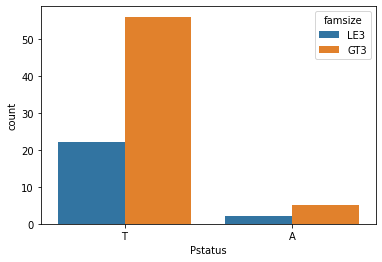

In [80]:
sns.countplot(x="Pstatus", hue ="famsize", data=both)

d:\Programs\ODU\env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='traveltime', ylabel='count'>

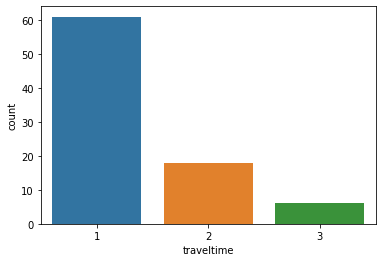

In [82]:
sns.countplot(both.traveltime)

<AxesSubplot:xlabel='address', ylabel='count'>

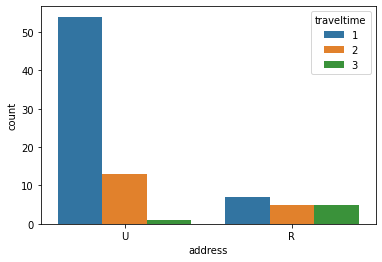

In [83]:
sns.countplot(x="address", hue ="traveltime", data=both)

d:\Programs\ODU\env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='studytime', ylabel='count'>

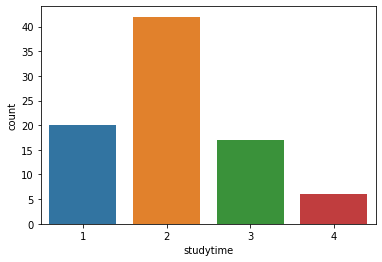

In [85]:
sns.countplot(both.studytime)

d:\Programs\ODU\env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='failures', ylabel='count'>

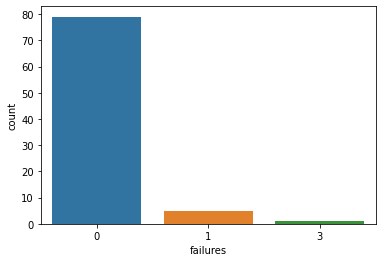

In [86]:
sns.countplot(both.failures)

<AxesSubplot:xlabel='age', ylabel='count'>

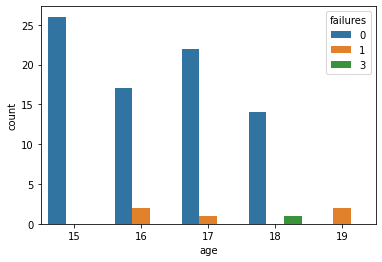

In [87]:
sns.countplot(x="age", hue="failures", data=both)

In [88]:
both.schoolsup.value_counts(normalize=True)

no     0.858824
yes    0.141176
Name: schoolsup, dtype: float64

In [89]:
both.famsup.value_counts(normalize=True)

yes    0.611765
no     0.388235
Name: famsup, dtype: float64

<AxesSubplot:xlabel='Walc', ylabel='count'>

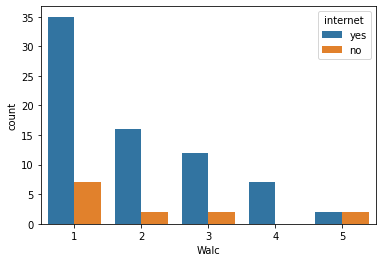

In [90]:
sns.countplot(x="Walc", hue="internet", data=both)

<AxesSubplot:xlabel='Dalc', ylabel='count'>

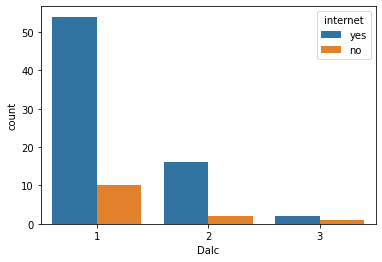

In [91]:
sns.countplot(x="Dalc", hue="internet", data=both)

<AxesSubplot:xlabel='age', ylabel='count'>

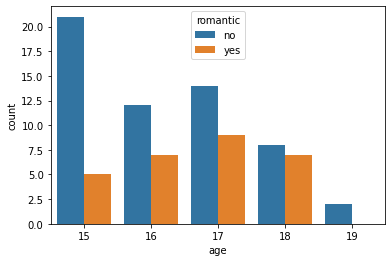

In [95]:
sns.countplot(x="age", hue="romantic", data=both)

<AxesSubplot:xlabel='freetime', ylabel='count'>

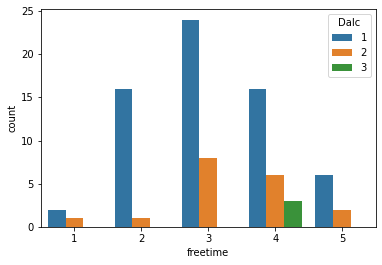

In [103]:
sns.countplot(x="freetime", hue="Dalc", data=both)

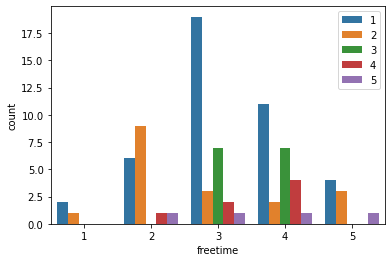

In [19]:
sns.countplot(x="freetime", hue="Walc", data=both)
plt.legend(loc='upper right')

In [41]:
temp=['sex','address','famsize','Pstatus','schoolsup','famsup','paid_x','activities','nursery','higher','internet','romantic']
labels=[]
from sklearn.preprocessing import LabelEncoder
le =LabelEncoder()
for item in temp:
    both[item]=le.fit_transform(both[item])
    labels.append(le.classes_)


<AxesSubplot:xlabel='sex', ylabel='count'>

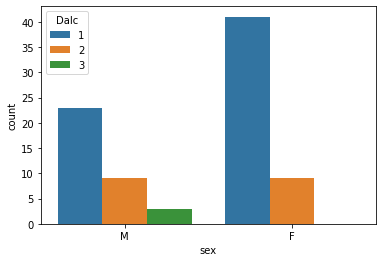

In [104]:
sns.countplot(x="sex", hue="Dalc", data=both)

<AxesSubplot:xlabel='sex', ylabel='count'>

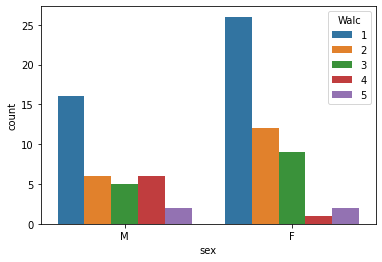

In [105]:
sns.countplot(x="sex", hue="Walc", data=both)

d:\Programs\ODU\env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Walc', ylabel='count'>

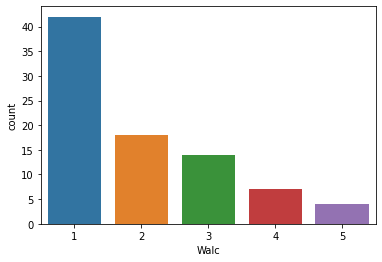

In [106]:
sns.countplot(both.Walc)

d:\Programs\ODU\env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Dalc', ylabel='count'>

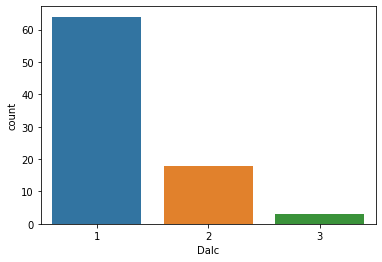

In [107]:
sns.countplot(both.Dalc)

d:\Programs\ODU\env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='health', ylabel='count'>

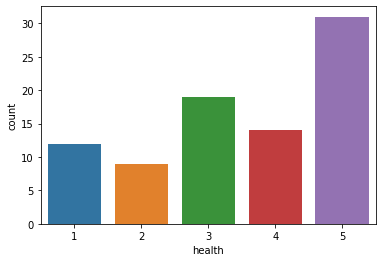

In [108]:
sns.countplot(both.health)

<AxesSubplot:xlabel='sex', ylabel='count'>

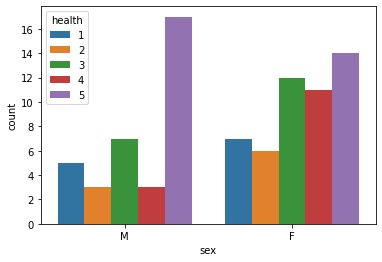

In [109]:
sns.countplot(x="sex", hue="health", data=both)

In [111]:
both['Total_Grades'] = both['G1_Por'] + both['G2_Por'] + both['G3_Por']

d:\Programs\ODU\env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='Total_Grades', ylabel='Density'>

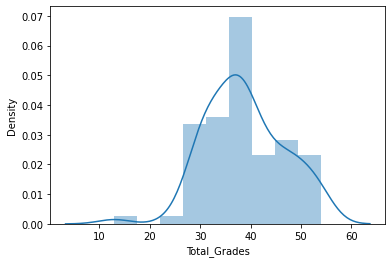

In [112]:
sns.distplot(both.Total_Grades)

In [42]:
labels

[array(['F', 'M'], dtype=object),
 array(['R', 'U'], dtype=object),
 array(['GT3', 'LE3'], dtype=object),
 array(['A', 'T'], dtype=object),
 array(['no', 'yes'], dtype=object),
 array(['no', 'yes'], dtype=object),
 array(['no', 'yes'], dtype=object),
 array(['no', 'yes'], dtype=object),
 array(['no', 'yes'], dtype=object),
 array(['no', 'yes'], dtype=object),
 array(['no', 'yes'], dtype=object),
 array(['no', 'yes'], dtype=object)]

In [45]:
both.to_csv('../FINAL DATASET/Performance/sp3.csv')

In [5]:
df= pd.read_csv('../FINAL DATASET/Performance/sp3.csv')

In [6]:
df.columns

Index(['Unnamed: 0', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu',
       'Fedu', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup',
       'paid_x', 'activities', 'nursery', 'higher', 'internet', 'romantic',
       'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences',
       'G1_Mat', 'G2_Mat', 'G3_Mat', 'paid_y', 'G1_Por', 'G2_Por', 'G3_Por'],
      dtype='object')

<AxesSubplot:xlabel='G3_Mat', ylabel='count'>

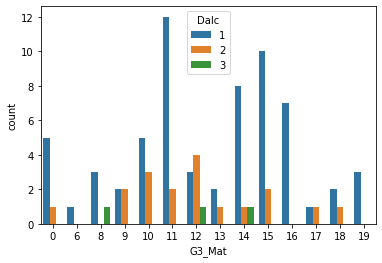

In [21]:
sns.countplot(x="G3_Mat", hue="Dalc", data=both)